In [1]:
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("https://github.com/Explore-AI/Public-Data/blob/master/house_price_by_area.csv?raw=true")
df.head()

,LotArea,SalePrice
0,138,1204000
1,145,1274000
2,152,1673000
3,152,1232000
4,152,1195600


In [4]:
X = df["LotArea"] 
y = df["SalePrice"] 


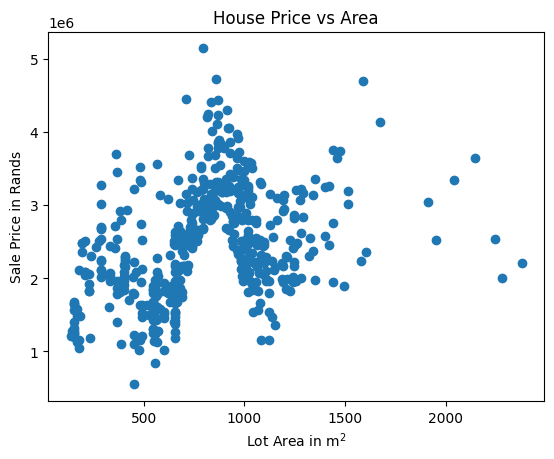

In [5]:
plt.scatter(X,y) 
plt.title("House Price vs Area")
plt.xlabel("Lot Area in m$^2$")
plt.ylabel("Sale Price in Rands")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# Convert X to a numpy array and then reshape it to add a new axis
# set test size to 20 % of training data
x_train, x_test, y_train, y_test = train_test_split(X.values.reshape(-1, 1), y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeRegressor

In [9]:
# Instantiate regression tree model
regr_tree = DecisionTreeRegressor(max_depth=2,random_state=42)

In [10]:
regr_tree.fit(x_train,y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


[Text(0.5, 0.8333333333333334, 'LotArea <= 703.5\nsquared_error = 561784175225.943\nsamples = 400\nvalue = 2458973.58'),
 Text(0.25, 0.5, 'LotArea <= 186.5\nsquared_error = 323392110249.354\nsamples = 167\nvalue = 1936189.353'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'squared_error = 33403062248.521\nsamples = 13\nvalue = 1331507.692'),
 Text(0.375, 0.16666666666666666, 'squared_error = 314400451749.991\nsamples = 154\nvalue = 1987233.909'),
 Text(0.75, 0.5, 'LotArea <= 980.0\nsquared_error = 396362266817.206\nsamples = 233\nvalue = 2833673.004'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'squared_error = 275593991651.893\nsamples = 116\nvalue = 3131405.948'),
 Text(0.875, 0.16666666666666666, 'squared_error = 341074993311.176\nsamples = 117\nvalue = 2538484.786')]

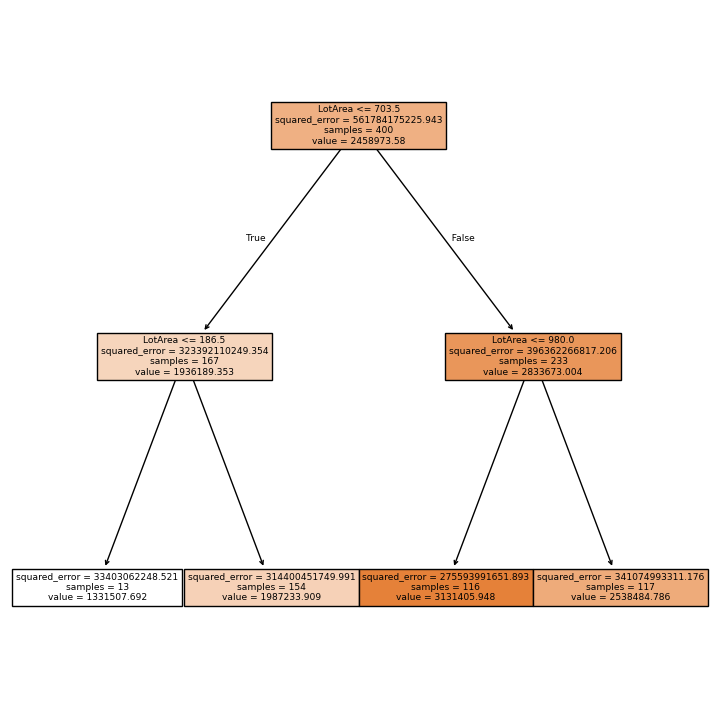

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(9,9))
plot_tree(regr_tree, feature_names=['LotArea'],  filled=True)

In [12]:
from sklearn.metrics import mean_squared_error
# get predictions for test data
y_pred = regr_tree.predict(x_test)

# calculate MSE
MSE = mean_squared_error(y_pred,y_test)

# Report RMSE
print("Regression decision tree model RMSE is:",np.sqrt(MSE))

Regression decision tree model RMSE is: 625573.2843752672


In [13]:
# Generate a range of equidistant points along the x-axis spanning from the minimum
# to the maximum X-values in the dataset, consisting of 100 points.
x_domain = np.linspace(min(X), max(X), 100)[:, np.newaxis] 

In [14]:
# predict y for every point in x-domain
y_predictions = regr_tree.predict(x_domain)

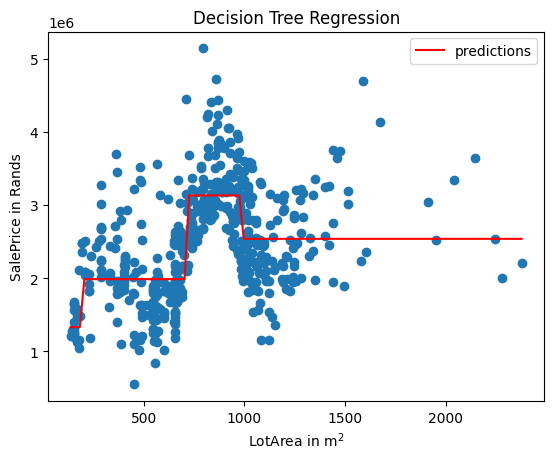

In [15]:
# plot the regression tree line over data
plt.figure()
plt.scatter(X, y)
plt.plot(x_domain, y_predictions, color="red", label='predictions')
plt.xlabel("LotArea in m$^2$")
plt.ylabel("SalePrice in Rands")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

Disadvantages:

Prone to overfitting.
Requires careful parameter tuning.
Susceptible to bias if certain classes dominate the dataset.